<a href="https://colab.research.google.com/github/rikvik2006/Bread-next-dashboard-API/blob/master/MNIST_Exercise_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installiamo le Dipendenze
Di default Google Collab ha gia installato le dipendenze che ci servono

In [ ]:
!pip install torch torchvision torchaudio

## Imports
Importiamo i moduli che ci servono, dobbiamo importare torch, come libreria pricipale e poi la libreria torchvision, e da questa importiamo i 2 package datasets, e transforms

In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
import torch.nn as nn
import torch.nn.functional as F

## Import per aggiustare i weights

In [8]:
import torch.optim as optim

Importiamo matploitlib per la visualizzazzione delle immagini

In [9]:
import matplotlib.pyplot as plt

# Neural Network Classes
Creiamo la classe della rete neurale, le classi delle reti neurali devono ereditare tutte dalla classe `nn.Module` che è la classe di base delle classi delle neural network.




In [6]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Immagine 28x28 = 784

    # Creiamo delle proprietà per che equivalgono ad ogni layer della rete neurale
    # Ogni neurone ha bisono di definire una funzione, noi utilizziamo la funzione Lineare
    # La funzione richiede come primo argomento il numero di neuroni in entrata, mentre il secondo paramentro indica i dati di output che devono uscire da ogni neurone
    self.inputLayer = nn.Linear(784, 64)
    # Ora definiamo
    self.hidden1 = nn.Linear(64, 64)
    self.hidden2 = nn.Linear(64, 64)
    self.ouputLayer = nn.Linear(64, 10)

  def forward(self, data):
    data = F.relu(self.inputLayer(data))
    data = F.relu(self.hidden1(data))
    data = F.relu(self.hidden2(data))
    data = self.ouputLayer(data)

    return F.log_softmax(data, dim=1)

In [3]:
trainingData = datasets.MNIST("", train=True, download=True, transform=transforms.ToTensor());
testingData = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 69862816.22it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 15899159.18it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40035725.89it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8848364.50it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
trainSet = torch.utils.data.DataLoader(trainingData, batch_size=10, shuffle=True)
testSet = torch.utils.data.DataLoader(testingData, batch_size=10, shuffle=True)

# Instanziamo la rete neurale

In [7]:
network = Network()

# Learning process

In [13]:
learningRate = optim.Adam(network.parameters(), lr=0.1)
epochs = 1

---------------
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 

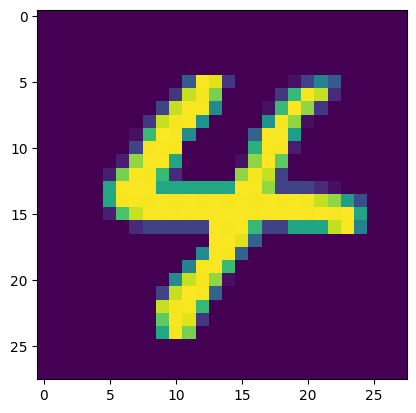

In [15]:
for i in range(epochs):
  for data in trainSet:
    image, output = data
    print("---------------")
    print(image)
    print("---------------")
    plt.imshow(image[0].view(28,28))
    print(output)
    print("---------------")
    break